In [2]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from knn_fish_detector import KNN

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [5]:
knn = KNN(7)
knn.fit(X_train, y_train)

In [6]:
df = pd.DataFrame()
n_neighbors, scores = [], []

for k in range(1, 22, 2):
    knn = KNN(k)
    knn.fit(X_train, y_train)
    score = knn.evaluate(X_test, y_test)

    n_neighbors.append(k)
    scores.append(score)

df["n_neighbors"] = n_neighbors
df["scores"] = scores

df

,n_neighbors,scores
0,1,0.966667
1,3,0.966667
2,5,0.966667
3,7,0.966667
4,9,1.000000
5,11,1.000000
6,13,1.000000
7,15,0.966667
8,17,0.966667
9,19,0.933333


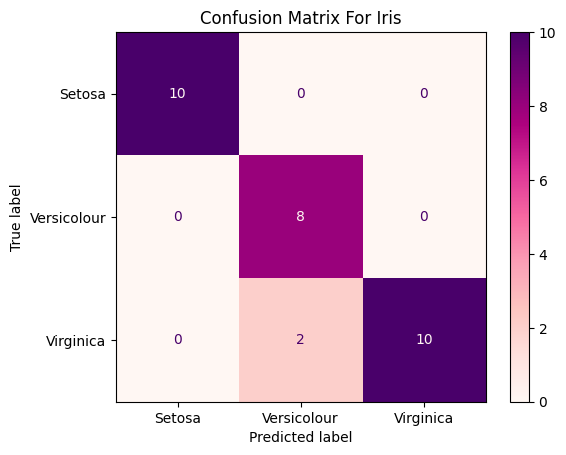

In [8]:
y_pred = knn.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion, display_labels=["Setosa", "Versicolour", "Virginica"])
cm_display.plot(cmap='RdPu')
plt.title("Confusion Matrix For Iris")
plt.show()